<a href="https://colab.research.google.com/github/joony0512/Linear_Programming/blob/main/Sales_cost_maximize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

가.세종플러스는 세종시에 위치한 대형 슈퍼마켓이다. 세종플러스에서는 최근 줄어든 매출액을 다시 늘리기 위해 VIP 고객을 대상으로 맞춤형 마케팅 전략을 수립하고자 한다. 이를 위해 세종플러스 데이터분석팀장 고세종씨는 다음과 같이 Task를 정리하고 작업을 시작하였다
1.	확보 가능한 VIP고객의 결혼여부, 교육정보, 소득수준의 자료를 토대로 Segment별 예상 매출액을 산출한다
A.	소득수준은 $10,000 단위로 구분한다
2.	산출된 예상매출액 정보와, 각 Segment의 마케팅 비용, 총 마케팅 예산 등의 정보를 활용하여 VIP고객 대상 예상 매출액을 최대화할 수 있는 Segment 우선순위를 찾는다
문제를 간단히 하기 위한 가정 사항은 다음과 같다
-	여러 사정 상 현재 확보가능한 데이터는 고객의 결혼여부, 교육정보, 소득 수준이다
-	각 Segment에 속한 VIP고객의 예상 매출액은 모두 동일하다
-	각 Segment의 VIP고객 수는 고려하지 않는다   

나.	데이터 설명
현재 확보 가능한 데이터의 각 Column의 간단한 Description은 다음과 같다  
변수	형태  
Education: 고객의 교육 수준	Categorical  

Marital Status: 결혼 여부	Categorical

Income (단위 $): 연 소득	Numeric  

MntPurchases (단위 $): 총 구매액	Numeric




In [1]:
import pandas as pd
import numpy as np

## 데이터 불러오기

In [2]:
Data =pd.read_excel('/content/drive/MyDrive/2023년 4학년 2학기/OA/기말고사/분석 데이터.xlsx')
Data

,Education,Marital_Status,Income,MntPurchases
0,2n Cycle,Divorced,87305,1152
1,Graduation,Together,42011,189
2,Graduation,Married,28442,57
3,PhD,Divorced,70179,1034
4,PhD,Together,76140,1348
...,...,...,...,...
1795,Graduation,Together,50127,320
1796,Graduation,Married,90765,1724
1797,Graduation,Single,42160,140
1798,PhD,Married,67353,913


In [3]:
Data['Marital_Status'].unique()

array(['Divorced', 'Together', 'Married', 'Single', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [4]:
Data['Education'].unique()

array(['2n Cycle', 'Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

<Axes: >

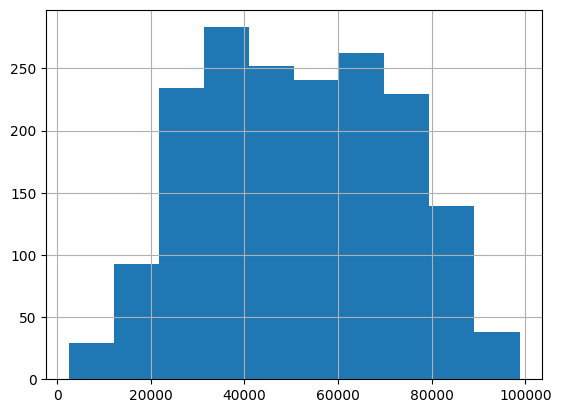

In [5]:
Data['Income'].hist()

<Axes: >

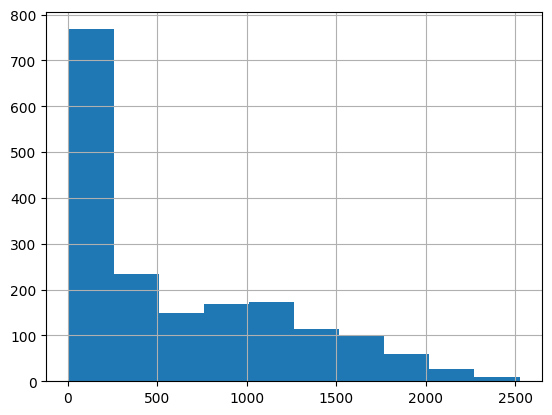

In [6]:
Data['MntPurchases'].hist()

## Segment별 예상 매출액 만들기

확보 가능한 VIP고객의 결혼여부, 교육정보, 소득수준의 자료를 토대로 Segment별 예상 매출액을 산출한다 A. 소득수준은 $10,000 단위로 구분한다

education_mapping = {
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}  
marital_status_mapping = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2,
    'Together': 2,
    'Widow': 2,
    'Alone': 2,
    'Absurd':2,
    'YOLO' : 2
}


### Data 정리

In [92]:
data = pd.read_excel('/content/drive/MyDrive/2023년 4학년 2학기/OA/기말고사/분석 데이터.xlsx')  

education_mapping = {
    'Basic': 20,
    '2n Cycle': 10,
    'Graduation': 30,
    'Master': 40,
    'PhD': 50
}

data['Education'] = data['Education'].map(education_mapping).astype(int)


In [93]:
data['Income'] = pd.cut(data['Income'], bins=range(1, data['Income'].max() + 10000, 10000), labels=[f"{(i+10000)/100}" for i in range(0, int(data['Income'].max()) + 1, 10000)])


In [94]:
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')  # 'Income' 열의 데이터 타입을 숫자형으로 변환


In [95]:
data['Income']

0        900.0
1        500.0
2        300.0
3        800.0
4        800.0
         ...  
1795     600.0
1796    1000.0
1797     500.0
1798     700.0
1799     400.0
Name: Income, Length: 1800, dtype: float64

In [96]:
marital_status_mapping = {
    'Single': 30,
    'Married':50,
    'Divorced': 10,
    'Together': 10,
    'Widow': 10,
    'Alone': 10,
    'Absurd':10,
    'YOLO' : 10

    
}

data['Marital_Status'] = data['Marital_Status'].map(marital_status_mapping).astype(int)


In [97]:
data

,Education,Marital_Status,Income,MntPurchases
0,10,10,900.0,1152
1,30,10,500.0,189
2,30,50,300.0,57
3,50,10,800.0,1034
4,50,10,800.0,1348
...,...,...,...,...
1795,30,10,600.0,320
1796,30,50,1000.0,1724
1797,30,30,500.0,140
1798,50,50,700.0,913


In [98]:
data['cost']=data['MntPurchases'] -(data['Education']+data['Marital_Status']+data['Income'] )
data

,Education,Marital_Status,Income,MntPurchases,cost
0,10,10,900.0,1152,232.0
1,30,10,500.0,189,-351.0
2,30,50,300.0,57,-323.0
3,50,10,800.0,1034,174.0
4,50,10,800.0,1348,488.0
...,...,...,...,...,...
1795,30,10,600.0,320,-320.0
1796,30,50,1000.0,1724,644.0
1797,30,30,500.0,140,-420.0
1798,50,50,700.0,913,113.0


# Randomforest

In [99]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
data = data # 데이터 파일명에 맞게 수정해주세요

# 변수 선택
features = ['Education', 'Marital_Status', 'Income']
target = 'cost'

# 그룹화하여 동일한 조합을 가진 데이터의 cost 평균 계산
grouped_data = data.groupby(features)[target].mean().reset_index()

# 데이터 전처리
X = grouped_data[features]
y = grouped_data[target]

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor 모델 생성 및 학습
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = rf.predict(X_test)

# 예측 결과 평가 (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# 전체 데이터 예측
predicted_cost = rf.predict(X)

# 예측된 cost 정보 추가
grouped_data['PredictedCost'] = predicted_cost


# 최종 결과 확인
print(grouped_data)


Mean Squared Error: 25679.11252362795
     Education  Marital_Status  Income        cost  PredictedCost
0           10              10   100.0  -43.500000     -93.664634
1           10              10   200.0 -149.166667    -190.038974
2           10              10   300.0 -237.076923    -258.386890
3           10              10   400.0 -326.875000    -272.846705
4           10              10   500.0  -14.444444    -330.581935
..         ...             ...     ...         ...            ...
116         50              50   600.0 -165.062500    -160.270446
117         50              50   700.0  328.137931     250.338081
118         50              50   800.0  468.263158     428.423024
119         50              50   900.0  492.642857     497.144771
120         50              50  1000.0  456.000000     596.903046

[121 rows x 5 columns]


In [100]:
grouped_data

,Education,Marital_Status,Income,cost,PredictedCost
0,10,10,100.0,-43.500000,-93.664634
1,10,10,200.0,-149.166667,-190.038974
2,10,10,300.0,-237.076923,-258.386890
3,10,10,400.0,-326.875000,-272.846705
4,10,10,500.0,-14.444444,-330.581935
...,...,...,...,...,...
116,50,50,600.0,-165.062500,-160.270446
117,50,50,700.0,328.137931,250.338081
118,50,50,800.0,468.263158,428.423024
119,50,50,900.0,492.642857,497.144771


In [101]:
grouped_data['Marketing_cost']=grouped_data['Education']+grouped_data['Marital_Status']+grouped_data['Income']
grouped_data[['Marketing_cost', 'PredictedCost']]

,Marketing_cost,PredictedCost
0,120.0,-93.664634
1,220.0,-190.038974
2,320.0,-258.386890
3,420.0,-272.846705
4,520.0,-330.581935
...,...,...
116,700.0,-160.270446
117,800.0,250.338081
118,900.0,428.423024
119,1000.0,497.144771


## LP Problem

In [102]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
import pandas as pd
from pulp import *

# 데이터 불러오기
data = grouped_data[['Marketing_cost', 'PredictedCost']] # 데이터 파일명에 맞게 수정해주세요

# 변수 선택
features = 'Marketing_cost'
target = 'PredictedCost'

# LPproblem 설정
problem = LpProblem("VIP_Selection", LpMaximize)

# 변수 생성
variables = []
for index, row in data.iterrows():
    variable = LpVariable(f"Costomer_{index}", lowBound=0, upBound=1, cat='Integer')
    variables.append(variable)

# 목적 함수 설정
problem += lpSum(variables[i] * data.loc[i, target] for i in range(len(variables)))

# 제약 조건 설정
problem += lpSum(variables[i] * data.loc[i, features] for i in range(len(variables))) <= 5000

# 세그먼트별 예상 비용에 따른 제약 조건 설정
for i in range(len(variables)):
    problem += variables[i] * data.loc[i, target] <= data.loc[i, target]

# 문제 풀이
problem.solve()

#  결과 출력
vip_list = []
for i, variable in enumerate(variables):
    if variable.varValue > 0:
        vip_list.append((i, data.loc[i, features]))

print("VIP List:")
for vip in vip_list:
    print("Row:", vip[0])
    print("Features:", vip[1])



VIP List:
Row: 5
Features: 620.0
Row: 22
Features: 660.0
Row: 40
Features: 640.0
Row: 50
Features: 660.0
Row: 60
Features: 680.0
Row: 69
Features: 650.0
Row: 78
Features: 670.0
Row: 87
Features: 690.0
Row: 97
Features: 660.0
Row: 106
Features: 680.0
Row: 116
Features: 700.0
